**Antes de comenzar, leer este link informativo:** https://mark-kramer.github.io/Case-Studies-Python/03.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Empezemos los ejemplos con una señal senoidal simulada

Fórmula del seno para una determinada frecuencia f:$\sin(2\pi ft)$

In [2]:
#Creamos el intervalo de tiempo, para que que tenga algunas diferencias con nuestra aplicación real, usemos 5 segundos muestrados a 1000 Hz
t = np.arange(0, 5, 0.001) #ti=0, tf=5, dt=0.001 => 1ms (1000 Hz de f)

#Ahora creamos una señal senoidal pura a una frecuencia de 10 Hz, recordando la formula del seno
s = np.sin(2*np.pi*10*t)

**Podemos observar la señal creada e interpretar que son esos 10 Hz a los que oscila el seno**

Text(0, 0.5, 'Amplitude')

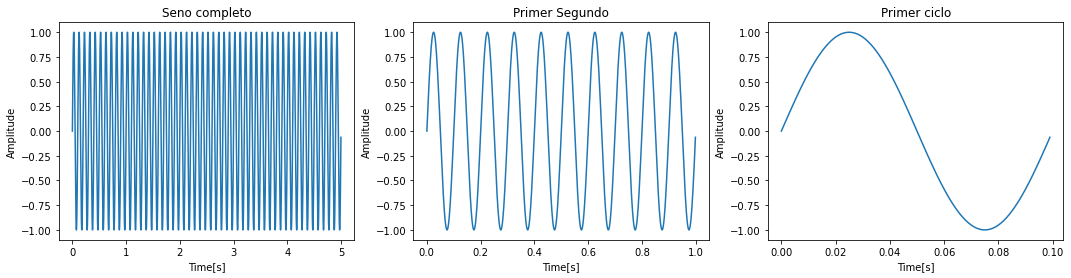

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(18)
axs[0].plot(t, s)
axs[0].set_title("Seno completo")
axs[0].set_xlabel("Time[s]")
axs[0].set_ylabel("Amplitude")
axs[1].plot(t[:1000], s[:1000])
axs[1].set_title("Primer Segundo")
axs[1].set_xlabel("Time[s]")
axs[1].set_ylabel("Amplitude")
axs[2].plot(t[:100], s[:100])
axs[2].set_title("Primer ciclo")
axs[2].set_xlabel("Time[s]")
axs[2].set_ylabel("Amplitude")

Observemos como la señal senoidal tiene un comportamiento *repetitivo*. 

En el segundo gráfico, en el que se muestra un único segundo, se aprecia que la forma de la onda se repite 10 veces a lo largo del mismo. Estas repeticiones se llaman ciclos o períodos, y son una característica fundamental en señales cíclicas o periódicas, señales compuestas por una forma que se repite a lo largo del tiempo.

Siendo que se cumplen 10 ciclos en un segundo, se dice que la onda senoidal tiene una **frecuencia (f)** de 10 Hz (Hertz o Hz es una unidad derivada de hacer $1/segundos$ o $(segundos)^{-1}$.

Otra manera de expresar la misma característica es a través de la duración del período, llamado directamente **período (T)**. Si un segundo tiene 10 ciclos/períodos, entonces un período ocupa 0.1 segundos. Expresándolo en una fórmula: $T=1/f$

## Análisis en Frecuencia

Ahora podemos usar el algoritmo FFT (Fast Fourier Transform) para calcular la transformada de Fourier discreta de esta señal. Aunque la cuestión es más compleja, básicamente podemos definir al algoritmo FFT como un método de cálculo de la *transformada de Fourier discreta* utilizando multiplicación de matrices, que si intentaramos calcularla manualmente nos llevaría más tiempo que el cálculo que realizamos usando la fórmula original (con la sumatoria), pero para el procesamiento en computadoras es vastamente más rápido.

In [63]:
#Para calcular la FFT usamos una funcionalidad de la librería Numpy

s_f = np.fft.rfft(s)

(0.0, 20.0)

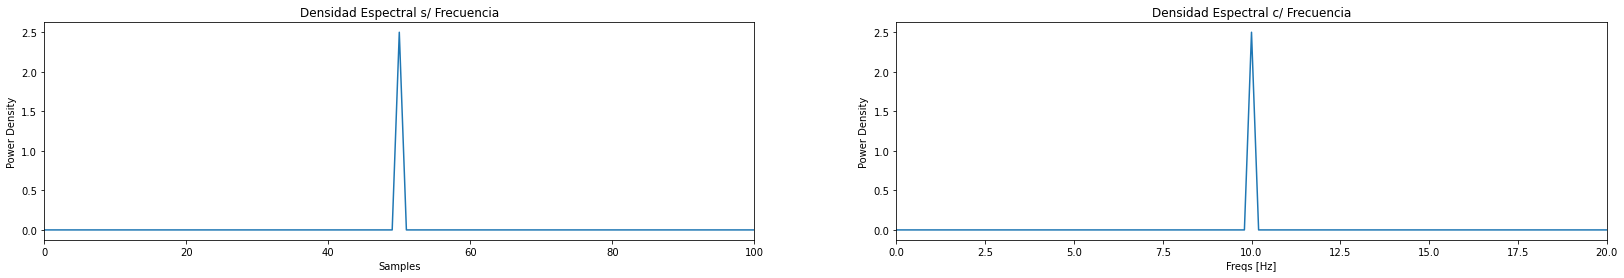

In [64]:
#Luego calculamos la densidad espectral utilizando la fórmula presentada en el link de información

dt = t[1]-t[0] #podríamos usar 0.001 que definimos previamente
T = t[-1] #podríamos usar el segundo 1 que mencionamos previamente
S_xx = ((2*dt**2)/T)*s_f*s_f.conj()
S_xx = S_xx.real

#Sin embargo, cuando intentemos graficarlo no tendremos indicación de la frecuencia a la que cada valor presente sucede
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_figwidth(28)
axs[0].plot(S_xx)
axs[0].set_xlabel("Samples")
axs[0].set_ylabel("Power Density")
axs[0].set_title("Densidad Espectral s/ Frecuencia")
axs[0].set_xlim((0,100)) #Limitamos el rango de x para poder obervar el pico de frecuencia correctamente, puede probar comentando esta línea para observar la diferencia

#Parece no tener sentido que el pico de frecuencia aparezca en el valor 50 si definimos el seno para tener una frecuencia 
#de 10 Hz, pero esto es porque no tenemos los valores de frecuencia definidos en el eje x, sino que estamos simplemente analizando
#las muestras de frecuencias obtenidas en la FFT y subsecuente densidad espectral

#En el link informativo estos valores de frecuencia se obtienen a partir de generar el rango correspondiente usando el df y
#la frecuencia de Nyquist. En su lugar podemos usar una función específica de Numpy en la que debemos indicar la cantidad de
#muestras y el dt (con estos valores Numpy hará las mismas operaciones que el proceso manual)

freqs = np.fft.rfftfreq(n=t.shape[0], d=dt)

axs[1].plot(freqs, S_xx)
axs[1].set_xlabel("Freqs [Hz]")
axs[1].set_ylabel("Power Density")
axs[1].set_title("Densidad Espectral c/ Frecuencia")
axs[1].set_xlim((0,20)) #Limitamos el rango de x para poder obervar el pico de frecuencia correctamente, puede probar comentando esta línea para observar la diferencia

#Ahora sí podemos observar la frecuencia de 10 Hz correctamente

## Comentarios:

- Como podrán observar no hicimos el recorte de intervalos de la densidad espectral como en el análisis llevado a cabo en el link informativo. Esto es porque utilizamos el comando rfft de Numpy, en vez de fft. Este uso se recomienda cuando se trabaja con señales puramente reales, en las cuales el intervalo de frecuencias negativas (correspondientes a las partes imaginarias) es un espejo de las frecuencias positivas, por lo que Numpy "ahorra" tiempo sólo calculando el intervalo de frecuncias positivas. Teniendo en cuenta que solo se obtendran los resultados reales, la multiplicación de la fft y su conjugada se reduce simplemente a multiplicación entre ff y sí misma (no hay parte imaginaria para conjugar), y tampoco tiene mucha funcionalidad el obtener la extracción de los valores reales de Sxx, ya que es completamente real.

- Aunque se mencionó previamente, notar que no usamos el proceso de calculo del vector de frecuencias que usa el link informativo, que consiste en generar un Numpy arange con los valores de 0 a la frecuencia de Nyquist con un paso de resoluci´n de frecuencia df, sino que aprovechamos la función rfftfreq de Numpy que realiza el mismo cálculo otorgándole los recursos necesarios: con la resolución temporal puede calcular la frecuencia de muestreo y con la mitad de la misma obtener la frecuencia de Nyquist, y con la cantidad de muestras multiplicada por la resolución temporal obtiene la duración temporal del intervalo con la que calcula la resolución de frecuencia para obtener el arange.

In [65]:
dt = 0.001
n = 1000

#Cálculo directo usando rfftfreq:
print("Cálculo directo:")
print(np.fft.rfftfreq(n=n, d=dt)[:20]) #Solo mostramos algunos valores para poder visualizarlo correctamente

#Cálculo manual con fórmulas del link
f_muestreo = 1/dt
f_nyquist = f_muestreo/2

t_total = n*dt
df = 1/t_total
print("Cálculo Manual:")
print(np.arange(0,f_nyquist,df)[:20])

Cálculo directo:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
Cálculo Manual:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


- En muchos casos no es necesario el valor específico del pico de frecuencia que vamos a analizar, sino su presencia o ausencia en cada intervalo, y su valor comparado con el resto de las frecuencias en un mismo intervalo o en la misma frecuencia en distintos intervalos. Siendo entonces la multiplicación de $2 dt^2/T$ es simplemente un escalamiento, podemos obviarlo y usar el valor absoluto de la FFT para evitar la multiplicación de conjugados (ya que como mencionamos antes no hay parte imaginaria)

(0.0, 20.0)

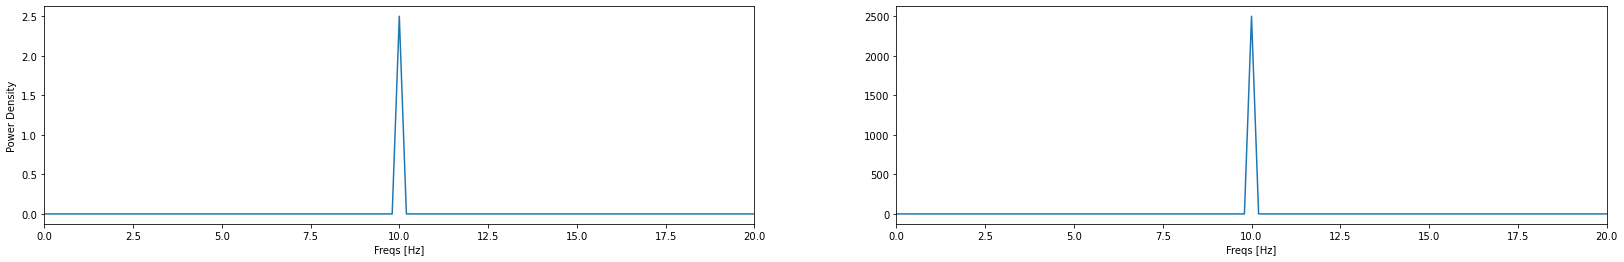

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(28)
axs[0].plot(freqs, S_xx)
axs[0].set_xlabel("Freqs [Hz]")
axs[0].set_ylabel("Power Density")
axs[0].set_xlim((0,20))

s_f_abs = abs(np.fft.rfft(s))

axs[1].plot(freqs, s_f_abs)
axs[1].set_xlabel("Freqs [Hz]")
axs[1].set_xlim((0,20))

Observar que la forma de onda de ambos resultados es la misma, sólo que los valores se encuentran escalados a valores diferentes.

## Armemos una función que nos plotee las transformadas y que podamos aplicar a las señales de estudio

In [113]:
def plot_spectral(signal, dt, freq_lim=None, amp_lim=None):
    N = signal.shape[0]
    T = N*dt
    
    fft = np.fft.rfft(signal)
    Sxx = ((2*dt**2)/T)*fft*fft.conj()
    
    freqs = np.fft.rfftfreq(n=N, d=dt)
    
    fig, axs = plt.subplots(1,1)
    fig.set_figwidth(10)
    
    axs.plot(freqs, Sxx)
    axs.set_ylabel("Spectral Density [$uV^2$/Hz]")
    axs.set_xlabel("Freq [Hz]")
    axs.set_title("Frequency Spectrum of Signal")
    axs.set_xlim(freq_lim)
    axs.set_ylim(amp_lim)

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


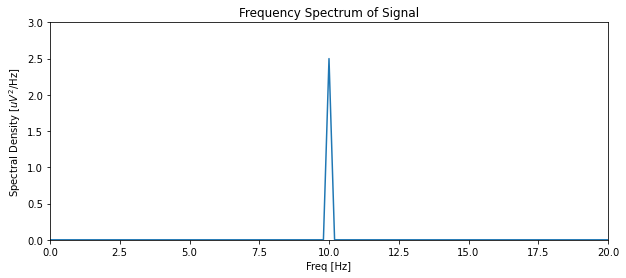

In [114]:
#La ponemos a prueba
plot_spectral(s, dt=0.001, freq_lim=(0,20), amp_lim=(0,3))

## Ahora carguemos la señal y hagamos los plots en cada canal

En mi caso cargaré como ejemplo la señal de AA0

In [115]:
import pandas as pd

sig_path = "C:/Users/Juanma/Desktop/AA 0 - 2020-10-28.csv"

sig_pd = pd.read_csv(sig_path, names=["sample", "Ch1", "Ch2", "Ch3", "Ch4", "x", "y", "z", "labels", "time", "stamp"])

sig_pd.drop(["sample", "x", "y", "z", "time", "stamp"], axis=1, inplace = True)

labels = sig_pd.pop("labels").values

sig_np = sig_pd.values.T

dt = 1/200
sig_pd.head()

,Ch1,Ch2,Ch3,Ch4
0,-1.86,-12.95,-9.18,-41.36
1,10.77,3.47,6.87,-15.13
2,87.61,65.61,88.78,32.23
3,83.04,50.88,77.30,4.49
4,8.07,-20.55,-6.68,-38.09


In [116]:
print("First 5 samples from the signal:")
print(sig_np[:, :5])
print()
print("First 5 samples from the labels:")
print(labels[:5])

First 5 samples from the signal:
[[ -1.86  10.77  87.61  83.04   8.07]
 [-12.95   3.47  65.61  50.88 -20.55]
 [ -9.18   6.87  88.78  77.3   -6.68]
 [-41.36 -15.13  32.23   4.49 -38.09]]

First 5 samples from the labels:
[99 99 99 99 99]


In [117]:
def detect_first_label(labels_array, label_to_detect):
    for i in range(labels_array.shape[0]):
        if labels_array[i] == label_to_detect:
            return i

In [118]:
label_one = detect_first_label(labels, 1)
print("Checking:", labels[label_one-3:label_one+4])
label_two = detect_first_label(labels, 2)
print("Checking:", labels[label_two-3:label_two+4])

Checking: [99 99 99  1  1  1  1]
Checking: [99 99 99  2  2  2  2]


## Pasemos ahora a las transformadas, haremos una por cada canal

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


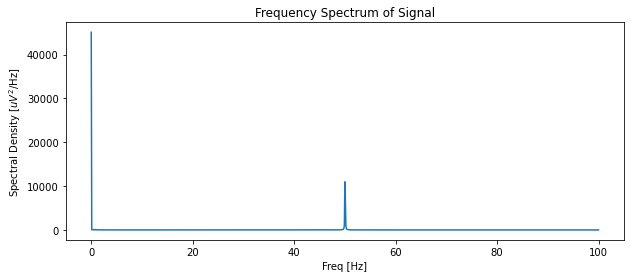

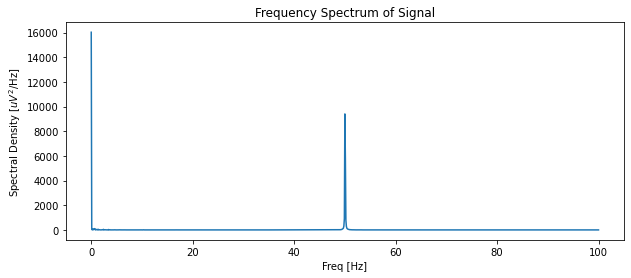

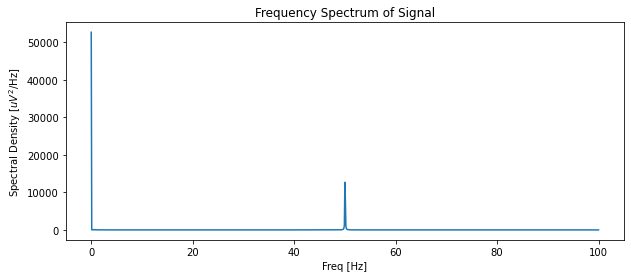

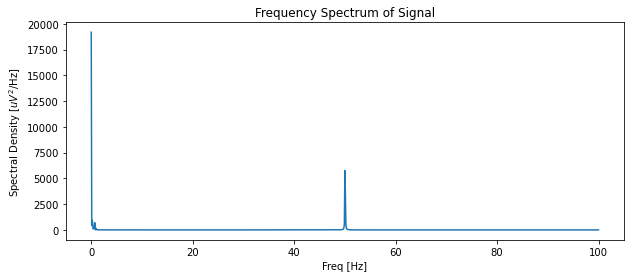

In [129]:
for ch in range(sig_np.shape[0]):
    plot_spectral(sig_np[ch, label_one:label_one+2000], dt=dt, freq_lim = None, amp_lim =None)

## Observación:

La deriva de continua y el pico de 50 Hz, generado por la interferencia electromagnética, son tan alto que hace que los picos de interés parezcan completamente nulos. En el link informativo sucedía algo similar con el pico de 60 Hz (frecuencia de luz de línea en europa). En ese caso se utilizaba la visualización en decibeles y logarítmica para poder mantener la observación. En nuestro caso probaremos otras dos cosas:

- Ya que las frecuencias de interés son las de estimulación (conocimiento del caso a estudiar) no nos hace falta conocer todo el espectro, podemos restringir la visualización al intervalo de 5 a 35 Hz (para incluir 12,5 Hz, 16,5 Hz y sus armónicos), y limitar el rango de amplitudes también.

- Aplicar métodos de filtrado en frecuencia

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


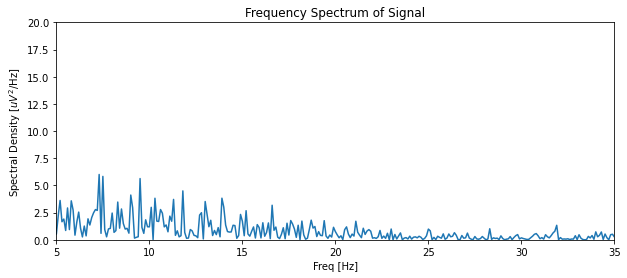

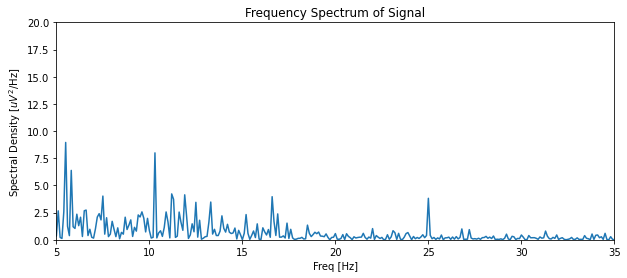

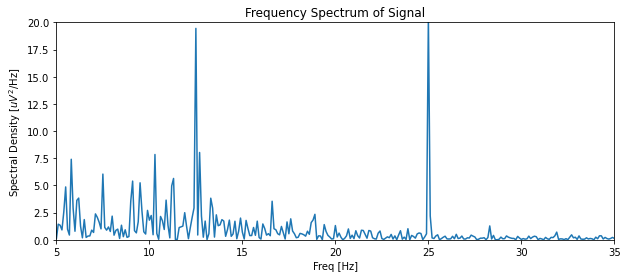

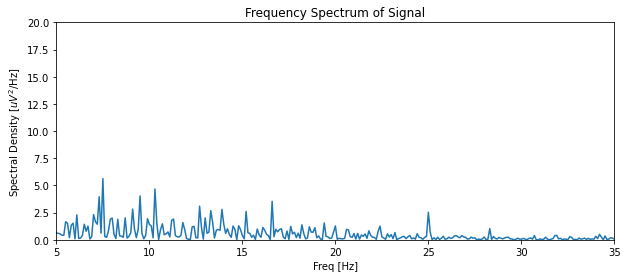

In [120]:
#Como no conocemos el rango de amplitudes, podemos probar hasta encontrar un valor en que se observen los valores
for ch in range(sig_np.shape[0]):
    plot_spectral(sig_np[ch, label_one:label_one+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0, 20))

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


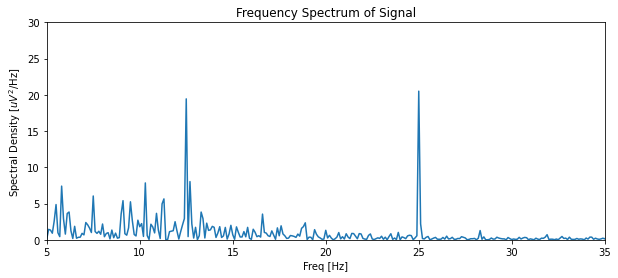

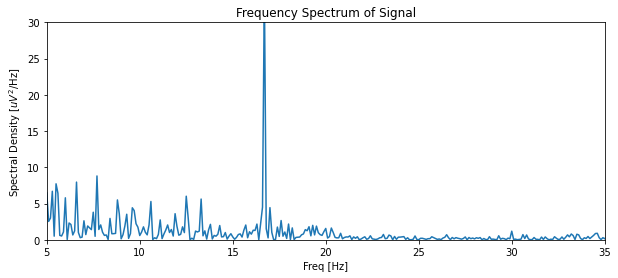

In [122]:
#Comparemos en un único canal, por ejemplo el canal 3, los plots en cada label
plot_spectral(sig_np[2, label_one:label_one+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0, 30))
plot_spectral(sig_np[2, label_two:label_two+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0, 30))

#### Ahora sí podemos observar los valores de 12,5 Hz y 16,5 Hz

## Filtrado

Por último, intentemos con el Filtrado en Frecuencia. Con el tiempo podremos entrar en mayor profundidad, pero por ahora es importante que sepan que el filtrado en frecuencia elimina frecuencias específicas de la señal. Existen muchos tipos de filtros, pero nos enfocaremos en 4:

**Filtro Pasa-Bajo:** elimina todas las frecuencias por encima de un cierto valor, deja pasar el resto.

**Filtro Pasa-Alto:** elimina todas las frecuencias por debajo de un cierto valor, deja pasar el resto.

**Filtro Pasa-Banda:** elimina todas las frecuencias que estén fuera de un intervalo/banda de ciertos valores, deja pasar aquellas que estén dentro del intervalo.

*De estos primeros 3 existen muchas variaciones, siendo Butterworth la más común y más simplemente aplicada*

**Filtro Notch:** elimina una frecuencia específica +/- un cierto rango.

La frecuencia específica que se menciona en cada caso suele llamarse frecuencia crítica.

**Veamos un ejemplo:**

In [123]:
#Para el filtrado usamos el paquete signal de la librería scipy
from scipy import signal as sgn

#Si queremos aplicar un filtro Butterworth pasa alto que solo conserve las frecuencias por encima de los 10 Hz
#Primero debemos crearlo con la función iirfilter, este crea dos valores a y b que representan a ESE filtro específicamente

sf = 200 #Frecuencia de muestreo
f_nq = sf/2 #Para crear el filtro debemos pasar la frecuencia a la que queremos filtrar (frecuencia crítica) divido la frecuencia de Nyquist
order = 4 #Podemos entrar en mayor detalle luego, pero el orden de un filtro es básicamente cuan "fuerte" el mismo se aplica

b, a = sgn.iirfilter(N=order, Wn=10/f_nq, btype="highpass", ftype="butter") #Existen muchos otros parámetros que se pueden configurar en el filtro, que pueden buscar y estudiar en la documentación.

#Habiendo creado el filtro, lo aplicamos con la función filtfilt

sig_filt = sgn.filtfilt(b, a, sig_np, axis=-1)

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


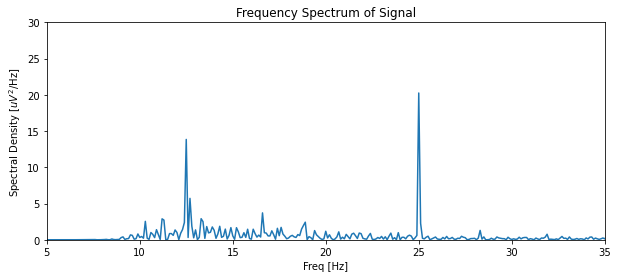

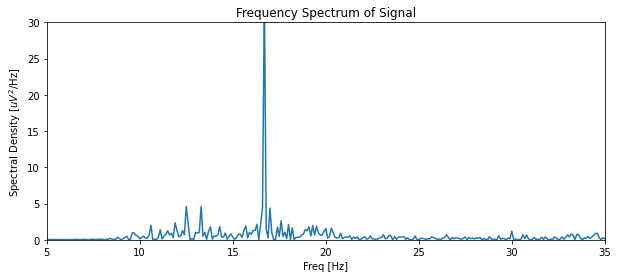

In [125]:
#Volvemos a plotear el canal 3 en cada uno de los labels para ver la diferencia
plot_spectral(sig_filt[2, label_one:label_one+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0, 30))
plot_spectral(sig_filt[2, label_two:label_two+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0, 30))

Pueden observar como las frecuencias por debajo de 10 Hz se anulan, pueden probar también cambiando los valores de orden del filtro para ver a qué nos referimos con un filtrado más fuerte o más débil.

## Ahora el filtrado real:

Si fueramos al caso real, no sólo queremos graficar la señal entre los valores de interés, queremos que el resto de los valores desaparezcan para que no molesten al análisis. Entonces aplicaremos un filtro pasabanda entre 5 y 40 Hz (procuramos alejarnos un poco de las frecuencias 12.5 Hz y 16.5 Hz ya que filtros de mucho orden aplicados en 10 Hz, por ejemplo, pueden llegar a afectar estas frecuencias), y un filtro Notch en 50 Hz (aunque esta frecuencia ya estaría filtrada por el filtro pasabanda, nos aseguramos de borrarla correctamente con el filtro Notch

C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Juanma\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


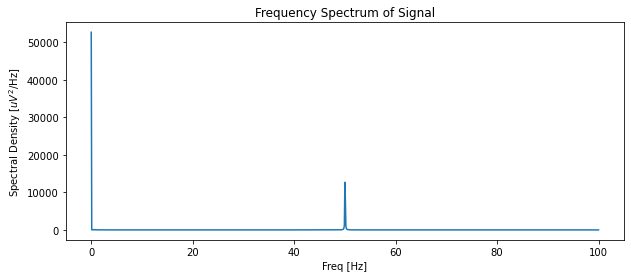

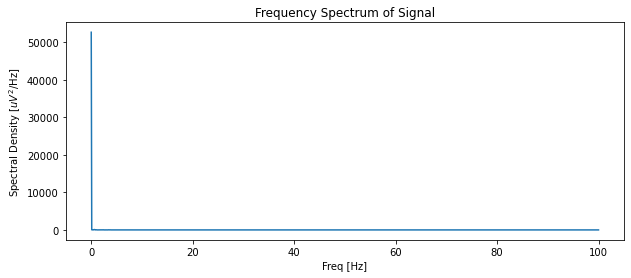

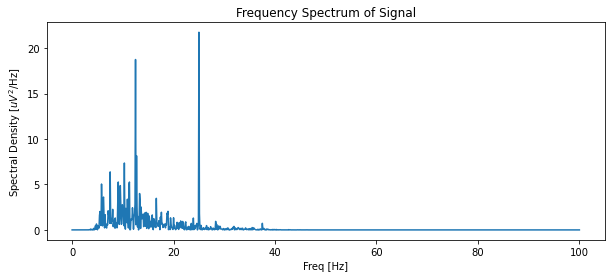

In [128]:
#Empezemos con un plot que muestre la señal original en la etiqueta 1
plot_spectral(sig_np[2, label_one:label_one+2000], dt=dt, freq_lim = None, amp_lim=None)

#Creemos y apliquemos primero el filtro Notch, este requiere otros parámetros (los cuáles pueden invesstigar en la docmentación)
#de los cuales usaremos

sf = 200 #Frecuencia de muestreo
Q=30 #calidad del filtro, es equivalente a determinar el orden del filtro Butter, indica cuán fuerte se filtra
f_notch = 50

b, a = sgn.iirnotch(w0=f_notch, Q=Q, fs=sf)
sig_notch = sgn.filtfilt(b, a, sig_np)

#Hagamos un primer ploteo a ver como queda, pero sin limitar el eje x
plot_spectral(sig_notch[2, label_one:label_one+2000], dt=dt, freq_lim = None, amp_lim=None)

#Ahora creamos el filtro pasabanda Butterworth

f_nq = sf/2
f_low = 5
f_high = 40
order = 4

b, a = sgn.iirfilter(N=order, Wn=[f_low/f_nq, f_high/f_nq], btype="bandpass", ftype="butter")
sig_filt = sgn.filtfilt(b, a, sig_notch)

#veamos ahora la señal final
plot_spectral(sig_filt[2, label_one:label_one+2000], dt=dt, freq_lim = None, amp_lim=None)

Observen como efectivamente el filtrado nos permitió eliminar en primer lugar el pico en 50, y en segundo lugar la continua y otros picos que interrumpan a la señal.

### Algo interesante para probar:

¿Que sucede si aplicamos un filtro pasabanda justo en las frecuencias que queremos analizar, y ploteamos no solo el espectro en frecuencia sino también la señal en tiempo? Por ejemplo agarramos uno de los intervalos de etiqueta 1 y filtramos entre 10 y 14 Hz; graficando las señales en tiempo y en frecuencia antes y después de filtrar.